# 第1節　データと課題の紹介
 ### ～扱う故障データ紹介～
 扱うデータを表１に示す。

 表１　13個の故障データ（単位：時間）

 [450 1150 1150 1600 2070 2070 2080 3100 3450 4600 6100 8750 Y]

 また、この時のYのデータは

 *Y = 13000+1000X*

 この式によって導出される。そして、今回の場合は学籍番号が*21D7104020H* であるので**X＝０**として考える。そのため、**Y=13000** となる。
### ～課題紹介～
表１のデータに対してロケーションスケールファミリーに属する最適な分布を求めパラメータを推定する。その時の手順は以下のとおりである。


1.   ノンパラメトリック推定による分布関数の推定

2.   確率プロット法による適切な分布についての検討を行い、適切な分布を決定する

3. 適切な分布による確率プロットを用いてパラメータ推定を行う

4. 推定されたパラメータによる、期待値、分散、1％クオンタイル、5％クオンタイル、99％クオンタイルを求める。




# 第2節　ノンパラメトリック推定

**手順**
1. 故障データの読み込みを行う
2. ノンパラメトリック推定を行い分布関数の値を求める
3. データとそれに対応する分布関数の推定値を表にまとめる
4. 横軸に時間、縦軸に推定した分布関数の値を取った図を作成する




データを読み込む

In [ ]:
library(tidyverse)
t=c(450,1150,1150,1600,2070,2070,2080,3100,3450,4600,6100,8750,13000)
n = length(t)
i = seq_along(t)
d = data.frame(i, t)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



読み込んだデータを可視化し、特徴を捉える。

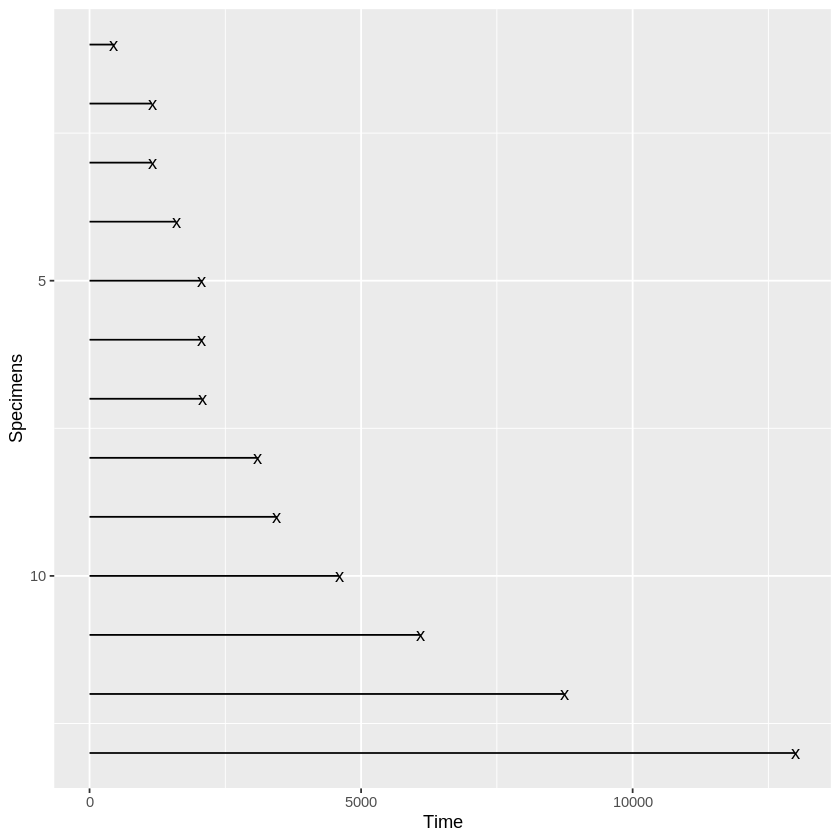

In [ ]:
d%>%
  ggplot(aes(0,i))+
  geom_segment(aes(xend=t,yend=i),show.legend = F)+
  geom_text(aes(x=t,label="x"),show.legend = F)+
  xlab(expression(paste("Time")))+
  ylab("Specimens")+
  scale_y_reverse()

それぞれのデータの発生確率がわからないため
\begin{aligned}p_{i}&={\frac{i-0.5}{{n}}}
\end{aligned}
この式によって求める。-0.5をするのはi=nの時に確率１となり必ず発生するという意味合いになってしまう。そこで0.5を引いて修正した。



データとそれに対応する分布関数の推定値を表にまとめる。その結果を下に示す

In [ ]:
d=d%>%mutate(p=(i-.5)/n)

In [ ]:
d

i,t,p
<int>,<dbl>,<dbl>
1,450,0.03846154
2,1150,0.11538462
3,1150,0.19230769
4,1600,0.26923077
5,2070,0.34615385
6,2070,0.42307692
7,2080,0.50000000
8,3100,0.57692308
9,3450,0.65384615


横軸に時間、縦軸に推定下分布関数の値を取った図を作成した結果を下の図に示す。

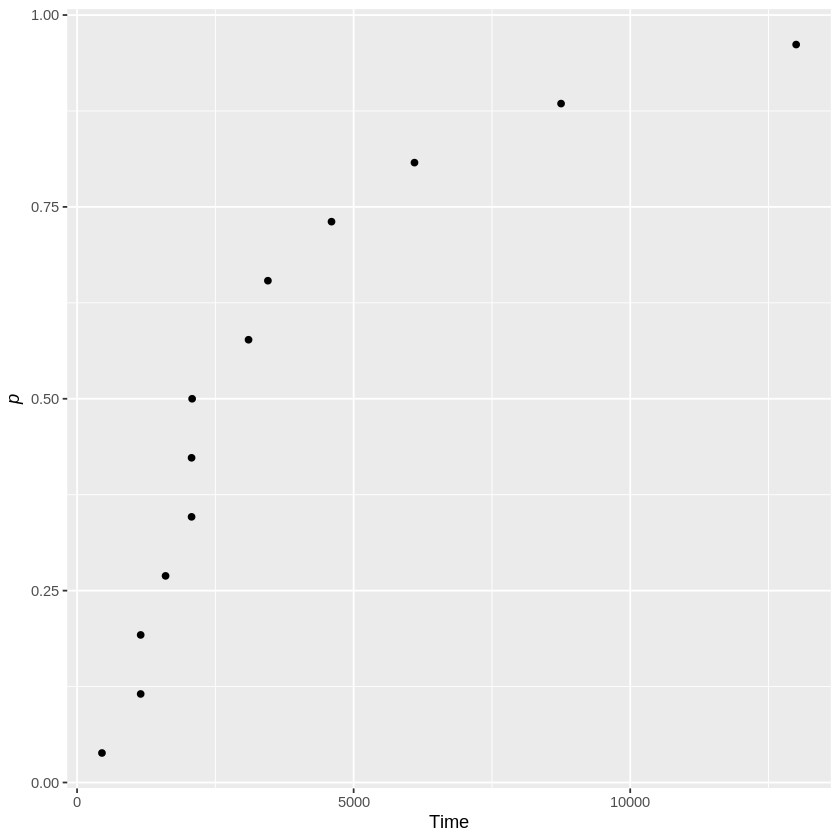

In [ ]:
plotAlloy = d%>%ggplot()+
  xlab(expression(paste("Time")))+
  ylab(expression(italic(p)))
plotAlloy + geom_point(aes(t,p))

#第３節 適切な分布の決定

**手順**
1. 正規分布、対数正規分布、最小極値分布、ワイブル分布で確率プロットの図を作る
2. プロットした図を見比べ、より点が直線になっている分布を選ぶ

正規分布、対数正規分布、最小極値分布、ワイブル分布の確率プロットを作成する。プロットした結果を下に示す

In [ ]:
plotAlloy = plotAlloy+ylab("Standard Quantile")

d = d%>%mutate(invNor = qnorm(p))
#plotAlloy+geom_point(data=d,aes(x=t,y=invNor))

d = d%>%mutate(log_t=log(t))
#plotAlloy+geom_point(data=d,aes(x=log(t),y=invNor))

d = d%>%mutate(invSEV = log(-log(1-p)))

#plotAlloy+geom_point(data=d,aes(x=t,y=invSEV))

#plotAlloy + geom_point(data=d, aes(x=log_t, y=invSEV))

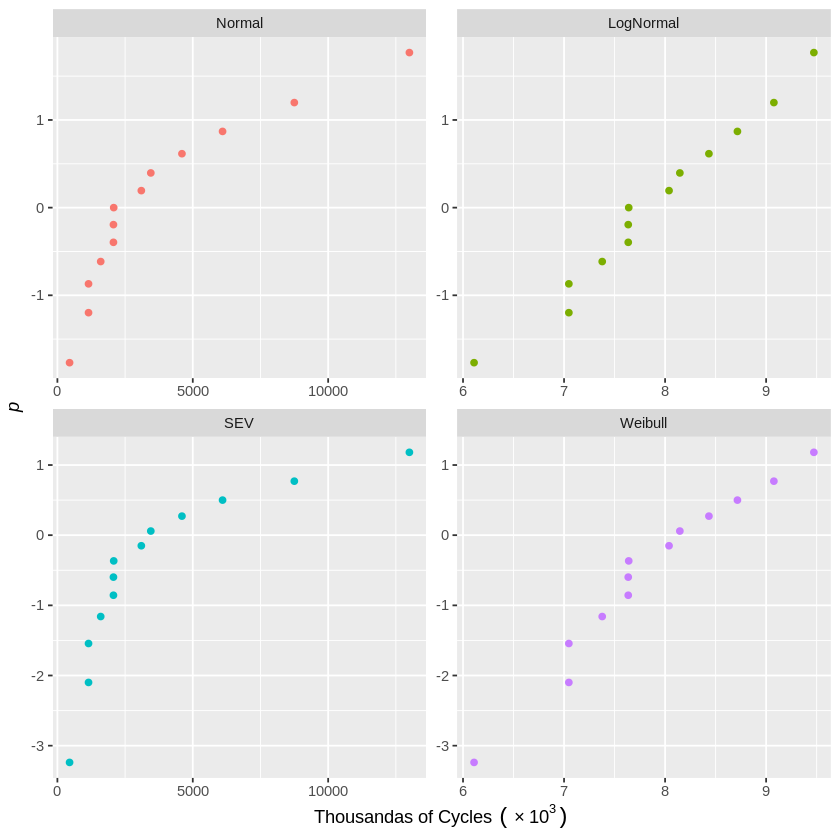

In [ ]:
bind_rows(
  data.frame(model="Normal",x=d$t,y=d$invNor),
  data.frame(model="LogNormal",x=d$log_t,y=d$invNor),
  data.frame(model="SEV", x=d$t, y=d$invSEV),
  data.frame(model="Weibull", x=d$log_t, y=d$invSEV)
  )%>%
    mutate(model = factor(model,levels = c("Normal", "LogNormal", "SEV", "Weibull")))%>%
    ggplot()+
    xlab(expression(paste("Thousandas of Cycles", " ", ("" %*% 10^3))))+
    ylab(expression(italic(p)))+
    geom_point(aes(x,y,col=model),show.legend = FALSE)+
    facet_wrap(~model,scales="free")



> 正規分布、対数正規分布、最小極値分布、ワイブル分布のそれぞれの確率尺度でプロットをした。その結果、最も対数正規分布の時に点が直線的にプロットされることがわかった。また、このように直線になることは対数正規分布への当てはまりが用という事を示している。


> そのため、今回のデータに対してもっとも対数正規分布の当てはまりが強いと考えられた。








当てはまりが最も強かった対数正規分布の確率プロットを以下に示す。

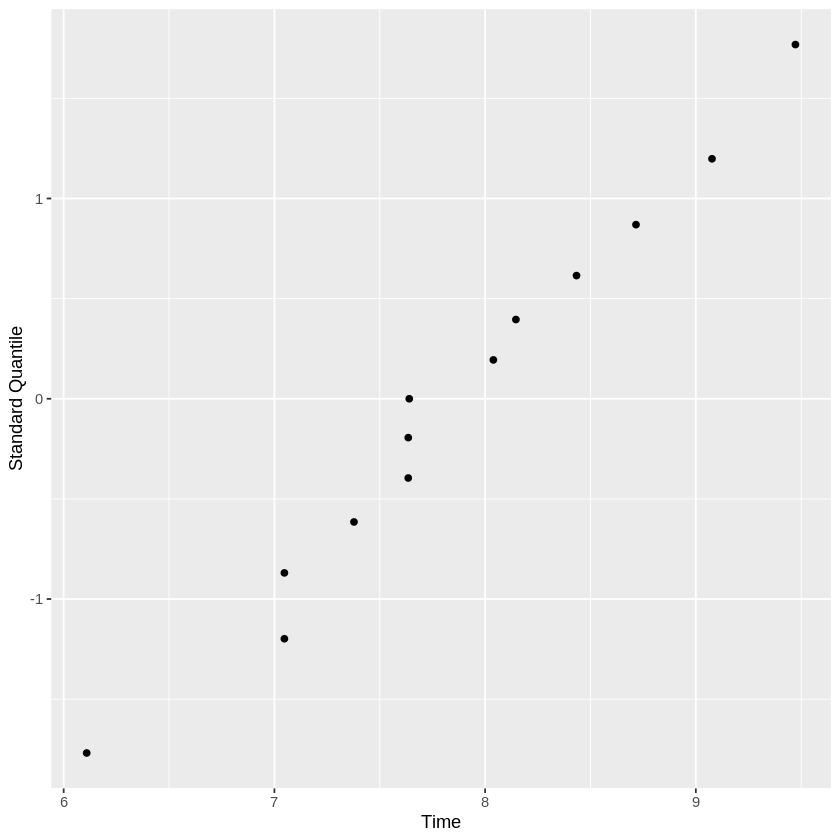

In [ ]:
plotAlloy = d %>% ggplot()+
xlab(expression(paste("Time")))+
ylab("Standard Quantile")
d = d %>% mutate(log_t = log(t), invNor = qnorm(p))
plotAlloy + geom_point(data=d, aes(x=log_t, y=invNor))

やはり直線的であることがわかる。

#第4節 パラメータ推定

**手順**
1. 特定した分布の確率プロットに対して単回帰モデルによる推定を行う。
2. 傾き、切片を求める。



> 今回のデータに対しては対数正規分布の当てはまりが最もよかったので、対数正規分布の確率プロットに対して単回帰モデルによる推定を行う。この時の直線の式は以下のようになる。

\begin{aligned}\Phi^{-1}_{nor}(p)= {\frac {1}{\sigma}}log(t_{p})-{\frac {\mu}{\sigma }}\end{aligned}



> この式の回帰係数を推定するときは最小二乗法によって推定を行う。最小二乗法によってパラメータを推定する方法を以下に示す。

\begin{align}\boldsymbol{x} = (x_1, x_2, ..., x_m)^Tとする\end{align}
\begin{align}\boldsymbol{y} = (y_1, y_2, ..., y_m)^Tとする\end{align}

\begin{align}
\epsilon & = \frac{1}{2}\sum_i (y_i - β^T\boldsymbol{x_i})^2 \\
& = \frac{1}{2}|\boldsymbol{y} - X\boldsymbol{β}| ^2 \\
& = \frac{1}{2}(\boldsymbol{y} - X\boldsymbol{β})^T(\boldsymbol{y} - X\boldsymbol{β})
\end{align}


\begin{align}
&\frac{\partial \epsilon}{\partial \boldsymbol{β}} = 0 \\
\iff &X^T(\boldsymbol{y} - X\boldsymbol{β}) = 0 \\
\iff &X^T\boldsymbol{y} - X^TX\boldsymbol{β} = 0 \\
\iff &\boldsymbol{β} = (X^TX)^{-1}X^T\boldsymbol{y}
\end{align}
このように回帰係数を求めることが出来る。






最小二乗法によってパラメータを推定する関数をleast.squareで定義する。

In [ ]:
least.square = function(x, y){
X = matrix(c(rep(1, length(x)), x), ncol=2)
Y = matrix(y)
beta = solve( t(X) %*% X ) %*% t(X) %*% Y
 return(beta)
}





> 対数正規分布として、単回帰モデルによる推定を行う。この時、定義したleast.square関数で下の式の傾き、切片を推定する。

\begin{aligned}\Phi^{-1}_{nor}(p)= {\frac {1}{\sigma}}log(t_{p})-{\frac {\mu}{\sigma }}\end{aligned}


> そして、その結果が下の結果である。





In [ ]:
x= log(d$t)
y = qnorm(d$p)
par = least.square(x,y)
par

-8.456892
1.073866




> 上の実行結果より\begin{aligned}切片=-8.456892\end{aligned}\begin{aligned}傾き=1.073866\end{aligned}であることがわかった。


この結果をもとに赤い直線と確率尺度を重ねた。この時の結果を以下に示す。

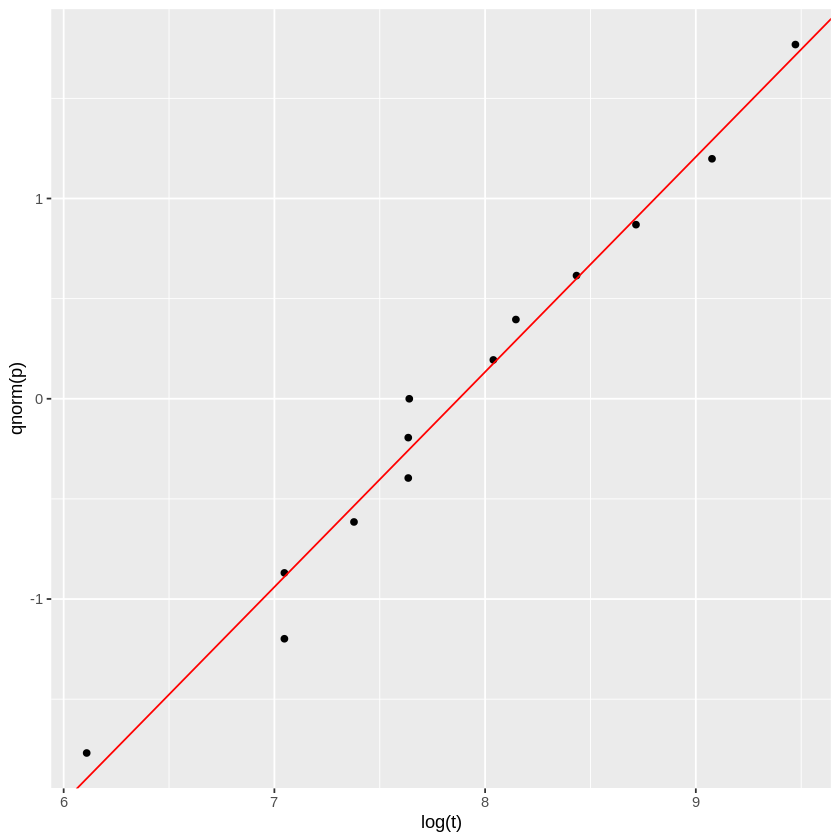

In [ ]:
d%>%
  ggplot()+
  geom_point(aes(log(t),qnorm(p)))+
  geom_abline(intercept = par[1],slope = par[2],col="red")

>上のグラフから確率尺度と推定した直線がかなり一致していることがわかった。

#第５節 期待値や分散などの特性値の算出及びデータと分布の確認






**手順**
1. 求めた傾き、切片から期待値、分散を求める
2. 求めた期待値、分散の推定値を用いて分布関数のP値を求める。
3. 分布関数の1%クォンタイル、５％クォンタイル、99%クォンタイルを求める

>最小二乗法によって
\begin{aligned}\Phi^{-1}_{nor}(p)= {\frac {1}{\sigma}}log(t_{p})-{\frac {\mu}{\sigma }}\end{aligned}
この式の傾き、切片の値がわかった。これらの値を用いてμ、σの推定値を求める。その時の式は以下である。
\begin{aligned}\hat{\sigma}= {\frac {1}{傾き}}\end{aligned}
\begin{aligned}\hat{\mu}= -切片×\hat{\sigma}\end{aligned}
この式をもとに平均、分散の推定値を求めた。その結果を以下に示す。

In [ ]:
hatsigma = 1/par[2]
hatmu = -par[1]*hatsigma
hatsigma
hatmu

[1] 0.9312152

[1] 7.875187


\begin{aligned}\hat{\sigma}= 0.931215212093526\end{aligned}
\begin{aligned}\hat{\mu}=7.87518677137335\end{aligned}
であることがわかった。

求めた期待値、分散の推定値を用いて分布関数のP値を求める。




\begin{aligned}対数正規分布のパラメータ(\hat{\mu},\hat{\sigma})が求まったのでこれらか累積分布関数の値\hat{p}を求める。\end{aligned}

\begin{aligned}\hat{p}=\Phi_{nor}{\bigg (}{\frac {log(t)-\hat{\mu}}{\hat{\sigma }}}{\bigg )}\end{aligned}
\begin{aligned}累積分布関数の\hat{p}は上記のように表せる。\end{aligned}

データとノンパラメトリック推定をしたP値と累積分布関数から求めたP値をまとめた表を以下に示す。

In [ ]:
d = d%>%mutate(hatp = pnorm((x-hatmu)/hatsigma))
d%>%select(t,p,hatp)

t,p,hatp
<dbl>,<dbl>,<dbl>
450,0.03846154,0.02895482
1150,0.11538462,0.18705371
1150,0.19230769,0.18705371
1600,0.26923077,0.29661173
2070,0.34615385,0.39835705
2070,0.42307692,0.39835705
2080,0.50000000,0.40035563
3100,0.57692308,0.56988540
3450,0.65384615,0.61445755




上記の結果をの（t,p）のデータを点としてプロットした。また、（t,hatp）の値を赤い線で結んだものを示したグラフを下に示す。



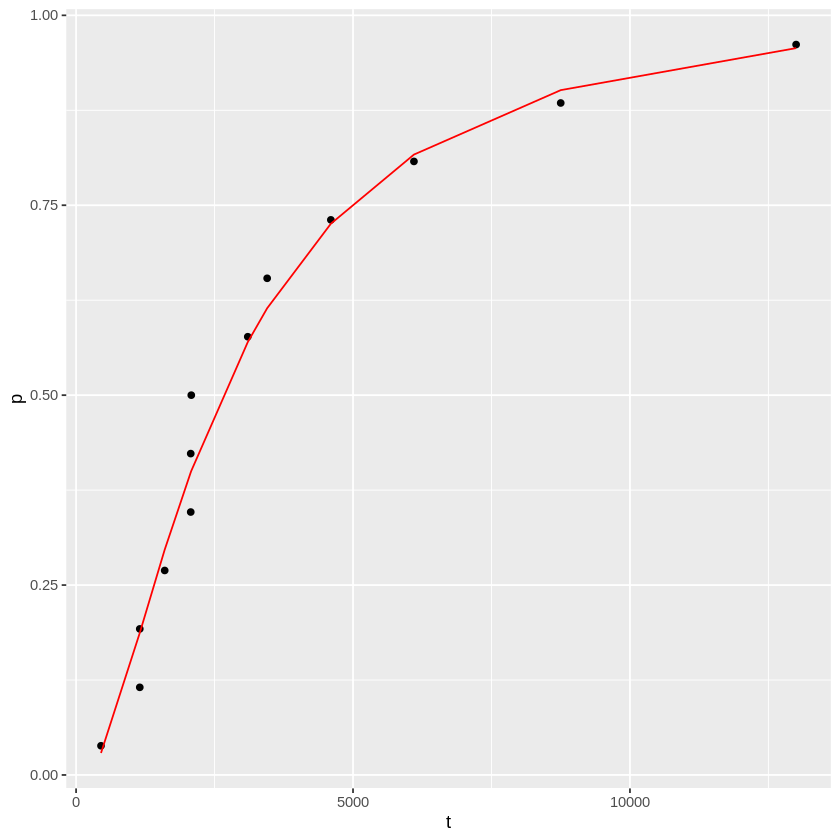

In [ ]:
d%>%
  ggplot()+
  geom_point(aes(t,p))+
  geom_line(aes(t,hatp),col="red")

上のグラフからノンパラメトリック推定した累積分布関数の値に、推定した対数正規分布の関数がよく当てはまっていることが分かった。



> 次に、対数正規分布の期待値、分散、それぞれのクオンタイルを求める。この時、期待値、分散、それぞれのクオンタイルは以下のように表せる。

\begin{aligned}E(T)&=\exp(\hat\mu-\frac{\hat\sigma^2}{2})\end{aligned}
\begin{aligned}Var(T)&=\exp(2 \hat\mu+ \hat\sigma^2)(\exp( \hat\sigma^2)-1)\end{aligned}

\begin{aligned}t_{p}&=\exp(\mu+ \sigma \Phi^{-1}_{nor}(p))\end{aligned}










これらを求めた結果を以下に示す

In [ ]:
expectation = exp(hatmu+hatsigma^2/2)
variance = exp(2*hatmu+hatsigma^2)*(exp(hatsigma^2)-1)
expectation
variance

[1] 4059.307

[1] 22742012

In [ ]:
t1 = exp(hatmu + hatsigma * qnorm(0.01))
t50 = exp(hatmu + hatsigma * qnorm(0.5))
t99 = exp(hatmu + hatsigma * qnorm(0.99))

In [ ]:
data.frame(t1,t50,t99)

t1,t50,t99
<dbl>,<dbl>,<dbl>
301.526,2631.178,22960.19


\begin{aligned}E(T)&=4059.3・・\end{aligned}
\begin{aligned}Var(T)&=22742011.・・\end{aligned}

\begin{aligned}t_{0.01}&=301.526
\end{aligned}
\begin{aligned}t_{0.5}&=2631.178
\end{aligned}
\begin{aligned}t_{0.99}&=22960.19
\end{aligned}
\begin{aligned}であることがわかった
\end{aligned}






> 最後に、観測データと仮定した対数正規分布のフィッティングの程度を確認する。この時、観測データをヒストグラムで表示し、その上に対数正規分布の密度関数を重ねることで確認をする。
密度関数の式は以下のように表せる。


\begin{aligned}\frac{1}{t\hat\sigma}ϕ_{nor}{\bigg (}{\frac {log(t)-\hat{\mu}}{\hat{\sigma }}}{\bigg )}\end{aligned}




上記のように表せることから確率密度を計算し、ヒストグラムと密度関数の赤い線を重ねたグラフを下に示す。

In [ ]:
d = d %>% mutate(hatd = 1/(hatsigma*t) * dnorm((log(t)-hatmu)/hatsigma))

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


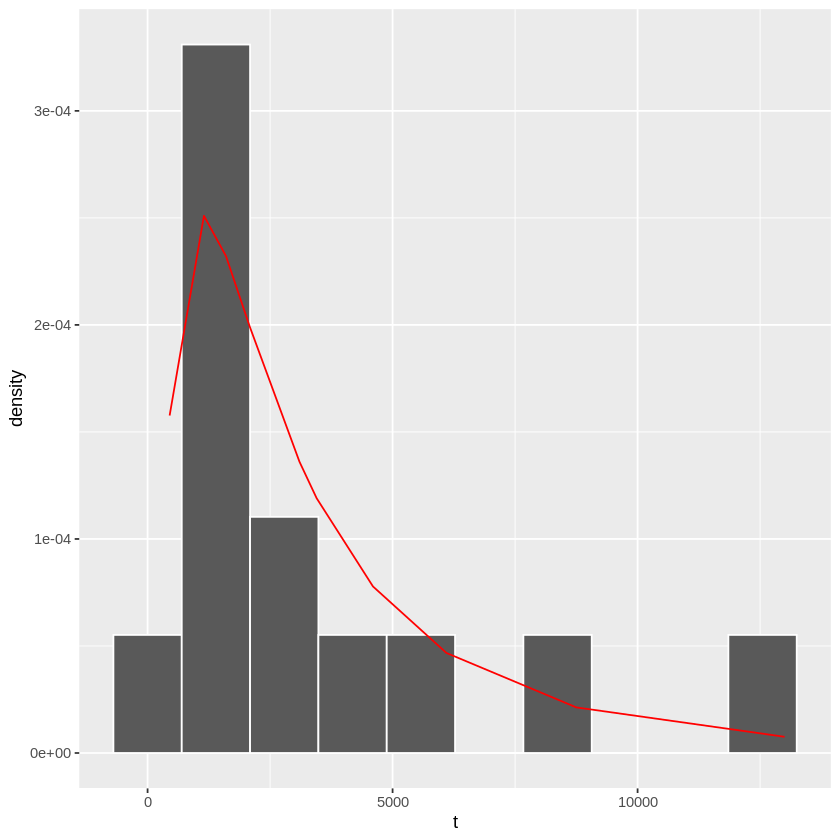

In [ ]:
d %>%
ggplot()+
geom_histogram(aes(t, ..density..), col="white", bins=10)+
geom_line(aes(t, hatd), col="red")

おおむね対数正規分布の密度関数と観測値のヒストグラムがフィットしているように見える。

# 第6節　考察

### データの特徴
> 今回のデータで確率尺度のプロットをすると対数正規分布の時が最も直線上に点がプロットされていることがわかった。つまり、このデータは対数正規分布に対して当てはまりが強いことが考えられた。さらに、ヒストグラムと対数正規分布の密度関数も同様に当てはまりが強いと考えられた。


> 求めた分散の値がかなり大きいため、求めた期待値の信頼区間が大きくなることがわかった。そのため、予測値の区間が広くなりすぎて、適切な予測になっていなと考えられた。そして、これを改善するためにはデータ数を増やすことで分散を小さくする必要があると考えられた。しかし、データ数を増やし過ぎるとバイアスが大きくなるため注意しなけばならないとも考えた。


### 今回の課題の仮定と問題点


> 今回の課題では視覚的に正規分布、対数正規分布、ワイブル分布、最小極値分布の4つのロケーションスケールファミリーの中から分布を選ぶことが前提となっていた。さらに、それぞれのデータの生起確率をノンパラメトリック推定する際に経験分布関数を求めることによって行った。


> 課題のデータが上記の4つの分布に従う前提で行っている点で問題があると考えられた。さらに、ノンパラメトリック推定で経験分布関数を求めて確率を推定した。この方法は、データ数が増えることで分散が小さくなり真の分布に収束していくという特性を持っている。そのため、今回はデータ数が少なかったため真の分布に収束させることが難しかったのではないかと考えた。また、タイのあるデータでは異なった確率の求め方をする必要があることが考えられた。

### 確率プロット法の全体的な利点と問題点
> 分布のわからないデータをプロットして視覚的にロケーションスケールファミリーの中の分布の中から適切な分布を簡単に探すことが出来る。そして、傾き、切片からパラメータが推定でき、真の分布の期待値、分散、クオンタイルを求めることが出来る点で便利であると考えられた。

> 確率プロットはロケーションスケールファミリーの枠組みの中からしか分布を推定する事しかできないということが問題であると考えられた。さらに、確率プロットによる分布の特定は視覚的な判断という簡便な方法であるため、正確さにかけるという問題も考えられた。そして、ノンパラメトリック推定されたデータを使うため、データが少ない場合は分散が大きくなり適切な推定結果が出ないのではないかと考えられた。






